In [1]:
import pandas as pd 
import numpy as np
credit_df = pd.read_csv( "German Credit Data.csv" ) 
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
amount               1000 non-null int64
savings_acc          1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
residing_since       1000 non-null int64
age                  1000 non-null int64
inst_plans           1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
status               1000 non-null int64
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [2]:
X_features = list( credit_df.columns ) 
X_features.remove( "status" ) 
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [3]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], 
drop_first = True)

In [4]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [5]:
encoded_credit_df[["checkin_acc_A12", "checkin_acc_A13", "checkin_acc_A14"]].head(5)

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [6]:
import statsmodels.api as sm
Y = credit_df.status
X = sm.add_constant(encoded_credit_df)

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size = 0.3,random_state = 42)

In [10]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train) 
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


In [11]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2021-09-29 18:19  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

In [13]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues ) 
    var_p_vals_df["vars"] = var_p_vals_df.index 
    var_p_vals_df.columns = ["pvals", "vars"]
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]["vars"] )

In [14]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

### Only the features ‘duration’, ‘amount’, ‘inst_rate’, ‘age’, ‘checkin_acc_A13’, ‘checkin_acc_A14’, ‘credit_history_A34’, ‘savings_acc_A65’ have come out as significant variables. 

In [16]:
final_logit = sm.Logit( y_train, 
sm.add_constant( X_train [significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [17]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2021-09-29 18:22 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

In [18]:
y_pred_df= pd.DataFrame( {"actual": y_test,"predicted_prob": final_logit.predict( sm.add_constant( X_test[significant_vars]))})

In [19]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [20]:
y_pred_df["predicted"] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


### Creating a Confusion Matrix

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sn
%matplotlib inline

In [83]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    fig, ax = plt.subplots(figsize=(8,8))
    sn.heatmap(cm, annot=True,fmt='g', center=0.5,linewidths=0.5,ax = ax ,xticklabels = ["Bad credit", "Good Credit"] , yticklabels = ["Bad credit", "Good Credit"] ) 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label') 
    plt.show() 
    


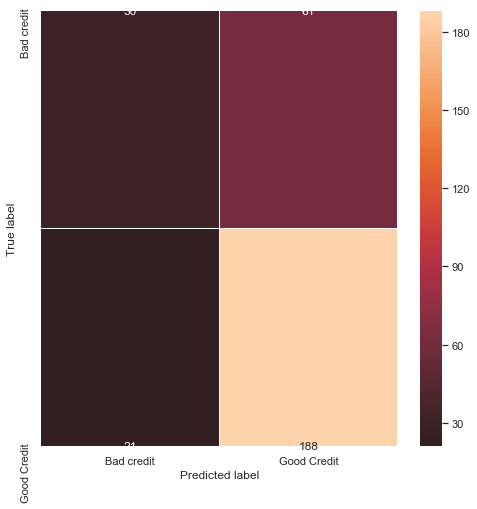

In [84]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

###  Measuring Accuracies

In [85]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



The model is very good at identifying the good credits (Y = 0), but not very good at identifying bad 
credits. This is the result for cut-off probability of 0.5%. This can be improved by choosing the right 
cut-off probability.

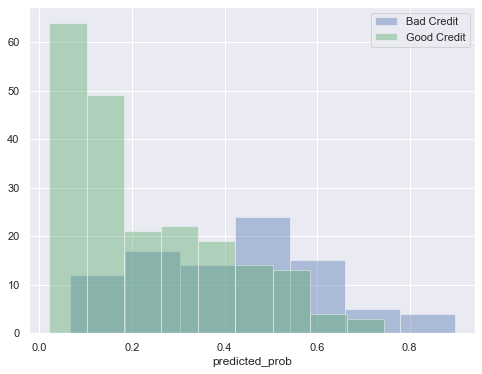

In [86]:
plt.figure( figsize = (8,6) )
# Plotting distribution of predicted probability values for bad credits
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b', label = "Bad Credit")
# Plotting distribution of predicted probability values for good credits
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = "g", label = "Good Credit") 
plt.legend()
plt.show()


We can use a chart to understand how the distributions of predicted probabilities for bad credit and 
good credit look like above. Larger the overlap between predicted probabilities for different classes,
higher will be the misclassifications. 

## ROC and AUC

In [88]:
def draw_roc( actual, probs ): 
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False ) 
    auc_score = metrics.roc_auc_score( actual, probs ) 
    plt.figure(figsize=(8, 6))
    # Plot the fpr and tpr values for different threshold values
    plt.plot( fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score ) 
    # draw a diagonal line connecting the origin and top right most point
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    # Setting x and y labels
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]") 
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right") 
    plt.show()
    return fpr, tpr, thresholds

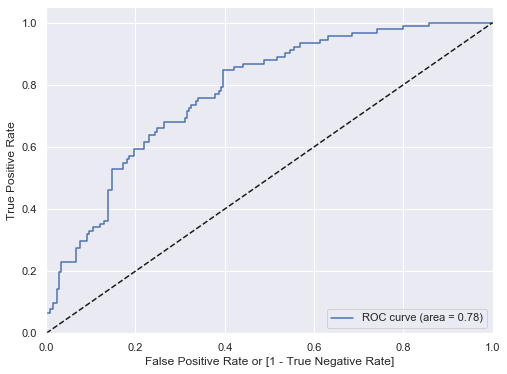

In [89]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

In [91]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob ) 
round( float( auc_score ), 2 )

0.78

## Finding Optimal Classification Cut-off
1. Youden’s index
2. Cost-based approach

1) Youden's index : aim is to select the cut-off probability for which (TPR + TNR – 1) is maximum.

In [92]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 
'fpr': fpr, 
'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr 
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


In [93]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( 
lambda x: 1 if x > 0.22 else 0)

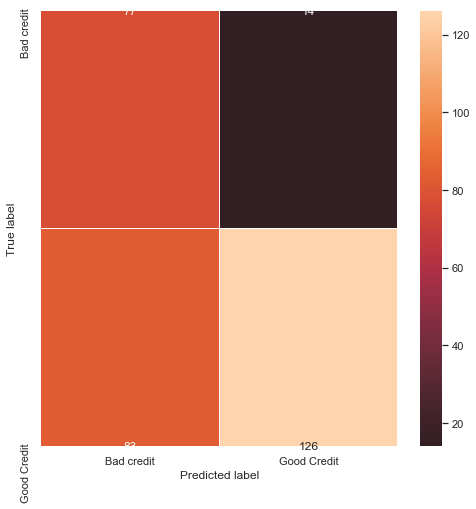

In [94]:
draw_cm( y_pred_df.actual, 
y_pred_df.predicted_new)

In [95]:
print(metrics.classification_report( y_pred_df.actual, 
y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300

